In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


In [12]:
import gmaps
api_key = API KEY HERE 

# Access maps with unique API key
gmaps.configure(api_key=api_key)

In [22]:

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [23]:
df=pd.read_csv('la_rest_types.csv', index_col=False)

In [24]:
#preserve a copy
df_dup=df

In [25]:
# df.sample()
df.head(2)


,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159,-118.267,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159,-118.267,91202


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61425 entries, 0 to 61424
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              61425 non-null  object 
 1   name            61425 non-null  object 
 2   address         61425 non-null  object 
 3   category_title  61425 non-null  object 
 4   rating          61425 non-null  float64
 5   review_count    61425 non-null  int64  
 6   lat             61425 non-null  float64
 7   lon             61425 non-null  float64
 8   zipcodes        61425 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [31]:
for col in ['id', 'name', 'address', 'category_title', 'zipcodes']:
    df[col] = df[col].astype('category')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61425 entries, 0 to 61424
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              61425 non-null  category
 1   name            61425 non-null  category
 2   address         61425 non-null  category
 3   category_title  61425 non-null  category
 4   rating          61425 non-null  float64 
 5   review_count    61425 non-null  int64   
 6   lat             61425 non-null  float64 
 7   lon             61425 non-null  float64 
 8   zipcodes        61425 non-null  category
dtypes: category(5), float64(3), int64(1)
memory usage: 4.8 MB


In [87]:
# df.isnull()

In [33]:
df['category_title'].replace(' ', np.nan, inplace=True)

In [34]:
# df.isnull()

In [35]:
df.dropna(inplace=True)

In [36]:
df.reset_index(drop=True)
df.sample(2)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
36987,nMTETHFLQfoBIOupb2eenw,Denny's,"1150 S Beach Blvd La Habra, CA 90631",Breakfast & Brunch,3.0,132,33.918,-117.967,90631
24930,Hg0tPlCUF1KZRwFsC8J4Cw,Tin Roof Bistro,"3500 N Sepulveda Blvd Manhattan Beach, CA 90266",Cocktail Bars,4.0,2094,33.900,-118.396,90266


In [37]:
df['category_title'] = df['category_title'].str.strip()
df.sample()

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
7701,6v1gaCLPp_tlQVQETcAjzQ,HIKARI Japanese BBQ & Grill,"2383 Lomita Blvd Ste 102 Lomita, CA 90717",Izakaya,4.5,203,33.805,-118.325,90717


In [38]:
# df.isnull()

In [39]:
#new dataframe restaurant types
rt=df
rt.head(10)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
0,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Middle Eastern,4.0,349,34.159,-118.267,91202
1,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Barbeque,4.0,349,34.159,-118.267,91202
2,__4rPIbNWudQVuoaRs2MuQ,Best Shawarma,"602 W Glenoaks Blvd Glendale, CA 91202",Armenian,4.0,349,34.159,-118.267,91202
4,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Fast Food,2.0,89,33.790,-118.162,90804
5,__6hsNl6ibtI6OE5NQQiPw,Taco Bell,"2500 E Pacific Coast Hwy Long Beach, CA 90804",Mexican,2.0,89,33.790,-118.162,90804
7,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Bars,4.5,274,34.054,-118.465,90049
8,__cvgBooF6k2Ra0nA14NGg,Bottlefish,"11677 San Vicente Blvd Ste 200 Los Angeles, ...",Seafood,4.5,274,34.054,-118.465,90049
10,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Seafood,3.0,49,34.038,-118.254,90015
11,__D9TH9-JRh_7CvWJcPZcQ,Baby Lobster,"1001 Maple Ave Ste 201 Los Angeles, CA 90015",Mexican,3.0,49,34.038,-118.254,90015
13,__GK0tVl6Dygt6BVn2TFrA,China Star Express,"1785 Palo Verde Ave Long Beach, CA 90815",Chinese,3.5,209,33.788,-118.108,90815


In [40]:
#total number of restaurants by unique ids
rt_ct = rt['id'].nunique()
rt_ct

19865

In [41]:
#how many types of food
rt_t_ct = rt['category_title'].nunique()
rt_t_ct

292

In [42]:
#list of types
#how many types of food

rt_list = rt['category_title'].value_counts()
# print(rt_list.to_string())

In [43]:
unique_types = df["category_title"].unique()
# unique_types.tolist()


In [44]:

rest_agg = df[['category_title', 'id', 'rating', 'review_count']]
rest_agg.sample()


,category_title,id,rating,review_count
2276,Tacos,1ateZH-To_8pBZ_gYqxhvQ,4.5,3


In [45]:
rest_agg.groupby('category_title').aggregate(['min', np.median, max])


rating             review_count             
                          min median  max          min median   max
category_title                                                     
Acai Bowls                2.5    4.5  5.0            1  111.5  1014
Afghan                    5.0    5.0  5.0            1    1.0     1
African                   3.0    4.0  4.5            2   41.0  2580
American (New)            1.0    4.0  5.0            1  339.0  6026
American (Traditional)    1.0    3.5  5.0            1  220.0  6276
...                       ...    ...  ...          ...    ...   ...
Wine & Spirits            2.0    4.0  5.0            1  136.0  1986
Wine Bars                 2.0    4.0  5.0            1  328.0  3595
Wine Tasting Room         4.5    4.5  4.5           97   97.0    97
Wineries                  4.0    4.5  5.0            1  671.0  1341
Wraps                     1.0    4.0  5.0            1  141.0  1749

[292 rows x 6 columns]

In [46]:
len(rest_agg)

41340

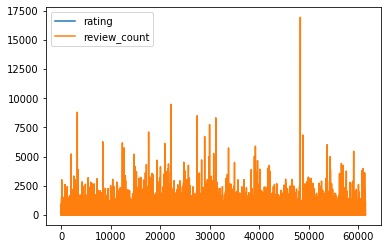

In [47]:
rest_agg.plot()

In [48]:
pd.set_option("display.max_rows", 999)
cat_frst=rt.sort_values(by=['category_title', 'review_count', 'rating','id',], ascending=False)
cat_frst.head(100)

,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
36407,NdVs6_MCxF3USRZB5efjPg,Secret Spot,"17200 Pacific Coast Hwy Huntington Beach, CA ...",Wraps,4.0,1749,33.712,-118.065,92649
6740,5w02oDAEtoEh0EOYs81Sww,Vegan Nirvana,"7862 Warner Ave Ste 110 Huntington Beach, CA...",Wraps,4.5,1342,33.715,-117.990,92647
56236,xkQ5s7bqKbRTU9yjPHGt9g,Sunnin Lebanese Cafe,"1776 Westwood Blvd Los Angeles, CA 90024",Wraps,4.0,1094,34.051,-118.437,90024
37228,nqYbRGPmYA0X_sjSBtXpgw,Sidewalk Grill,"1727 N Vermont Ave Ste 102 Los Angeles, CA 9...",Wraps,4.5,961,34.103,-118.292,90027
55423,x4k-csqCwofptVyYSIxtXw,California Chicken Cafe,"2005 Westwood Blvd Los Angeles, CA 90025",Wraps,4.0,951,34.046,-118.434,90025
28455,Jc-8o2_Q1iookt0Bipk9fw,Original Kabob Factory,"1700 W Glenoaks Blvd Ste D Glendale, CA 91201",Wraps,4.5,939,34.171,-118.290,91201
53592,W8RQPUOgLC7d_kO0h3B_QA,California Chicken Cafe,"6805 Melrose Ave Los Angeles, CA 90038",Wraps,4.0,852,34.084,-118.341,90038
28581,je8j0jRI-ECcAec4o7hQiA,California Chicken Cafe,"15601 Ventura Blvd Encino, CA 91436",Wraps,3.5,847,34.155,-118.473,91436
11991,ArqAzONXEq2AWvJ_II4a-A,My Vegan Gold,"4319 W Sunset Blvd Los Angeles, CA 90029",Wraps,4.5,767,34.095,-118.283,90029
21654,fpssH8ad9X5fFKqTC2ghwA,Green Tomato Grill,"796 N Brea Blvd Brea, CA 92821",Wraps,4.0,735,33.932,-117.894,92821


In [49]:
pd.set_option("display.max_rows", 999)
top_rate=rt.sort_values(by=['category_title', 'id', 'review_count', 'rating',], ascending=False)
top_rate.sample()



,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
10004,9g4OLFYtZCZLFVsMP_mHjA,Tropical Cuban Café,"2900 Sunset Blvd Los Angeles, CA 90026",Cafes,2.0,45,34.083,-118.274,90026


In [50]:
top_rate['category_title'].value_counts()

Mexican                         3466
Sandwiches                      2067
Fast Food                       1964
Breakfast & Brunch              1852
Burgers                         1769
Pizza                           1499
Seafood                         1212
American (Traditional)          1209
American (New)                  1119
Coffee & Tea                    1037
Japanese                        1028
Chinese                          973
Italian                          903
Sushi Bars                       849
Korean                           802
Food Trucks                      742
Chicken Wings                    736
Salad                            731
Tacos                            686
Cafes                            624
Barbeque                         598
Asian Fusion                     577
Thai                             519
Bars                             498
Mediterranean                    490
Delis                            483
Food Stands                      429
V

In [51]:
tacos=top_rate[(top_rate["review_count"]>=100) & (top_rate["category_title"]== 'Tacos')]
tacos


,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
60720,zyRFrQo4-WUfEO-K2cRgkQ,Taco Nazo - Bellflower,"10326 Alondra Blvd Bellflower, CA 90706",Tacos,4.5,3197,33.889,-118.114,90706
60367,zs9_P73LrWtr_GOICGEIlA,Tacos El Goloso,"1212 W Anaheim St Los Angeles, CA 90710",Tacos,4.5,141,33.782,-118.298,90710
60238,zpQfRpjW_J_g7OhtkIv2FQ,Tacos El Primo,"8693 Venice Blvd Los Angeles, CA 90034",Tacos,4.5,152,34.033,-118.382,90034
59580,zEcKQS3E-p7fy70dzXKZIQ,Los Tacos Amigos,"2235 W Lincoln Ave Anaheim, CA 92801",Tacos,4.0,119,33.833,-117.961,92801
58151,ylZVhacAcNkR19zgYHOQgQ,Quezada’s Tacos,"15544 La Mirada Blvd La Mirada, CA 90638",Tacos,4.0,109,33.891,-118.001,90638
58807,yXNZiSDhU47hWfCreKHATw,Str8 Up Tacos,"8471 Walker St La Palma, CA 90623",Tacos,4.5,635,33.839,-118.038,90623
56860,xUGWFxlErwAU_IE_vtEdFw,FishBonz Casual Seafood Grill,"2599 Airport Dr Torrance, CA 90505",Tacos,4.0,695,33.792,-118.329,90505
56558,xPLtv8UrLEiAg9IR9sEtDw,Victoria's Tacos & Grill,"4204 San Fernando Rd Glendale, CA 91204",Tacos,4.0,517,34.130,-118.260,91204
55299,x0ENUAI-QU1yFuPA43celw,Chema's Tacos,"11527 Whittier Blvd Whittier, CA 90601",Tacos,4.5,330,33.984,-118.054,90601
54551,wPNoWhizJYe-YTsL9QeUaw,Jalapeño Pete's,"11618 Ventura Blvd Los Angeles, CA 91604",Tacos,4.0,412,34.140,-118.386,91604


In [52]:
persian=top_rate[(top_rate["rating"]>= 1) & (top_rate["category_title"]== 'Persian'+"/"+'Iranian')]
persian


,id,name,address,category_title,rating,review_count,lat,lon,zipcodes
59624,zFaOwOIpnv-FhVnZ93TYYg,Jino's Pars - Persian and Italian Restaurant,"5844 W Manchester Ave Los Angeles, CA 90045",Persian/Iranian,4.0,525,33.960,-118.384,90045
59236,z7b1YkJvdq_mr0ti91gj7A,The Grill Spot,"17334 Ventura Blvd Los Angeles, CA 91316",Persian/Iranian,4.0,184,34.160,-118.511,91316
56774,xt0UfrleYOtIukJ1jD6S7w,Kurosh Persian Restaurant,"8560 Wilshire Blvd Beverly Hills, CA 90211",Persian/Iranian,4.5,7,34.065,-118.378,90211
55853,xeljswpuYqUmJlPhX4Q-LQ,Saffron Grill,"17441 Beach Blvd Huntington Beach, CA 92647",Persian/Iranian,4.0,578,33.709,-117.990,92647
56995,xXhzYUkAJXzvOxP-ShixHQ,Dizin Persian Cuisine,"6740 Reseda Blvd Unit E Los Angeles, CA 91335",Persian/Iranian,4.5,367,34.193,-118.536,91335
53965,wfPL9HN8BKwk6Q5dDzIb0Q,Nayeb Kabab,"1300 S Los Angeles St Los Angeles, CA 90015",Persian/Iranian,4.5,31,34.035,-118.259,90015
53054,vxqOrG-n7ni7y9-dJGeSvA,Street Kabbob Eastla,"4729 E Olympic Blvd Los Angeles, CA 90022",Persian/Iranian,4.5,29,34.018,-118.167,90022
52808,vtK8-BFDUBRqNlTDKkRiKg,Shayan Express Restaurant,"945 S Wall St Ste 6 Los Angeles, CA 90015",Persian/Iranian,4.5,130,34.038,-118.253,90015
51434,v5_dNxHg1F5Y-h_nSeLVow,Kabob By Faraj Restaurant & Kosher Meat Market,"8680 W Pico Blvd Los Angeles, CA 90035",Persian/Iranian,4.5,242,34.054,-118.381,90035
49444,u3Ui7KKJGap_lhSnAdqUTg,Gypsy's Persian Grill,"21 S 39th Pl Long Beach, CA 90803",Persian/Iranian,4.0,393,33.760,-118.148,90803


In [53]:
lat=list(persian['lat'])
lon=list(persian['lon'])

zip(lat, lon)
coordinates = [x for x in zip(lat, lon)]



# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
rest_name=persian['name'].tolist()
# Assign the marker layer to a variable
info_box_content=[f"Restaurant name: {name}" for name in rest_name]
markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
heat_layer = gmaps.heatmap_layer(coordinates,  weights=persian['rating']+5,
                                 dissipating=False, max_intensity=5,
                                 point_radius = .018)
# Add the layer to the map
fig.add_layer(heat_layer)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [54]:
# bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

In [55]:
# bestR=aT[(aT["review_count"]>=500) & (aT["rating"]== 5)]

# lat=list(bestR['lat'])
# lon=list(bestR['lon'])

# zip(lat, lon)
# coordinates = [x for x in zip(lat, lon)]



# # Customize the size of the figure
# figure_layout = {
#     'width': '400px',
#     'height': '300px',
#     'border': '1px solid black',
#     'padding': '1px',
#     'margin': '0 auto 0 auto'
# }

# fig = gmaps.figure(layout=figure_layout)
# rest_name=bestR['name'].tolist()
# # Assign the marker layer to a variable
# info_box_content=[f"Restaurant name: {name}" for name in rest_name]
# markers = gmaps.marker_layer(coordinates, info_box_content=info_box_content )
# heat_layer = gmaps.heatmap_layer(coordinates, weights=bestR['rating']-5, 
#                                  dissipating=False, max_intensity=5,
#                                  point_radius = .018)
# # Add the layer to the map
# fig.add_layer(heat_layer)
# fig.add_layer(markers)
# fig